# Scraping Data from Game Of Thrones List of Episodes in Wikipedia and Doing EDA on Them

## Scraping Data using Beautiful Soup and using Pandas to save Data on a CSV file

In [243]:
%matplotlib inline 

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import seaborn.apionly as sns 

In [244]:

url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

In [245]:

tables= soup.find_all('table',{'class':'wikitable plainrowheaders wikiepisodetable'})
data = []
columns = []
for table in tables:
    rows = table.find_all('tr')
    if(tables.index(table)==0):
        columns = [v.text.replace('\u200a[20]','') for v in rows[0].find_all('th')]

    for i in range(1, len(rows)):
        ths = rows[i].find_all('th',{'scope':'row'})
        valuex = [th.text for th in ths]
        tds = rows[i].find_all('td')
        value = []
        for td in tds:
            if(td.find('sup')):
                value.append(td.text[0:5].replace('[',''))
            else:
                value.append(td.text)
        #value = [td.text for td in tds]
        valuey = valuex + value
        #print(valuey)
        data.append(valuey)
    if(tables.index(table)==7):
        break

In [1]:
df = pd.DataFrame(data, columns = columns)
df.to_csv('Downloads/Data_Science_Lab/GoT.csv', encoding='utf-8', index=False)

NameError: name 'pd' is not defined

In [248]:
dfgot= pd.read_csv('Downloads/Data_Science_Lab/GoT.csv')

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58


## Formatting Table Header Names and Data for EDA

In [249]:
dfgot=dfgot.rename(columns={"No.overall":"Number_Overall","No. inseason":"Number_in_season","U.S. viewers(millions)":"Viewers","Directed by":"Director","Written by":"Writer","Original air date":"Air_Date"})
dfgot.head()

,Number_Overall,Number_in_season,Title,Director,Writer,Air_Date,Viewers
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58


In [250]:
dfgot= dfgot.replace({"Story by : David Benioff & D. B. Weiss Teleplay by : Jane Espenson and David Benioff & D. B. Weiss":"David Benioff & D. B. Weiss"})

In [252]:
sns.reset_defaults()

## Showing Average Viewers Count in Million for Each Director
Following List and The Plot Shows Mean Viewer Count for Each Director in Each Episode

In [271]:
group_dir = dfgot.groupby('Director').Viewers.mean()
group_dir

Director
Alan Taylor                     4.517143
Alex Graves                     6.230000
Alik Sakharov                   5.717500
Brian Kirk                      2.490000
D. B. Weiss                     6.640000
Daniel Minahan                  3.240000
Daniel Sackheim                 7.550000
David Benioff                   4.720000
David Benioff & D. B. Weiss    13.610000
David Nutter                    7.475556
David Petrarca                  3.775000
Jack Bender                     7.300000
Jeremy Podeswa                  8.368333
Mark Mylod                      7.908333
Matt Shakman                   10.445000
Michael Slovis                  7.405000
Michelle MacLaren               6.020000
Miguel Sapochnik                8.910000
Neil Marshall                   5.165000
Tim Van Patten                  2.210000
Name: Viewers, dtype: float64

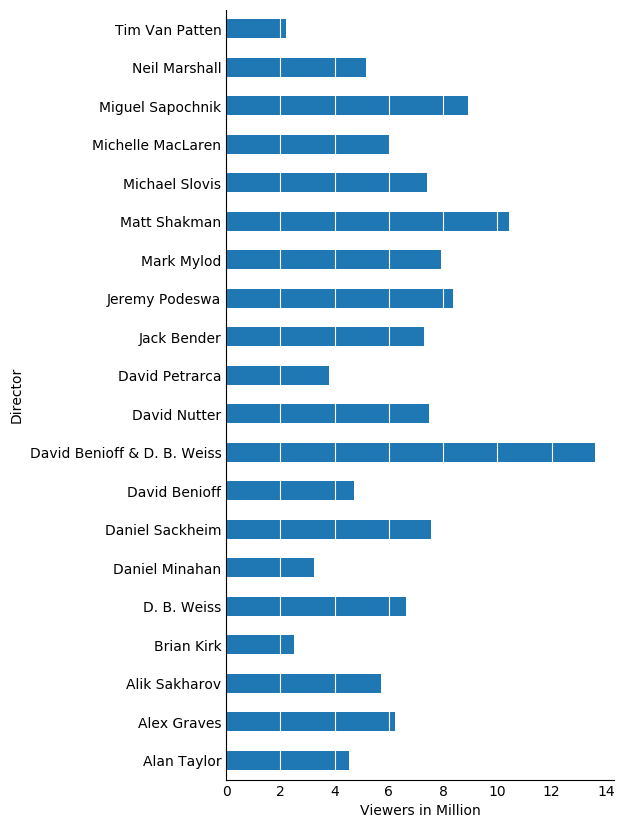

In [280]:
plt.figure(figsize = (5,10))
ax = plt.gca()
group_dir.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
plt.xlabel("Viewers in Million")
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

## Showing Average Viewers Count in Million for Each Writer
Following List and The Plot Shows Mean Viewer Count for Each Writer in Each Episode

In [255]:
group_writer = dfgot.groupby('Writer').Viewers.mean()
group_writer

Writer
Bryan Cogman                   6.526364
Dave Hill                      9.147500
David Benioff & D. B. Weiss    6.534510
George R. R. Martin            4.312500
Vanessa Taylor                 3.933333
Name: Viewers, dtype: float64

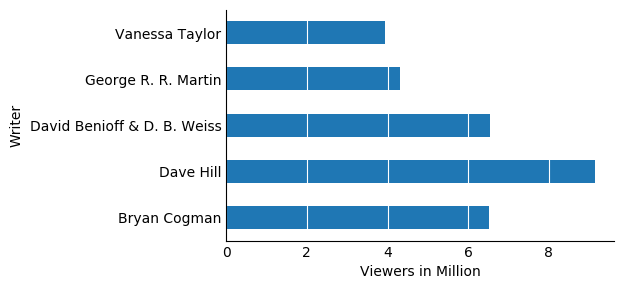

In [256]:
plt.figure(figsize = (5,3))
ax = plt.gca()
group_writer.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
plt.xlabel("Viewers in Million")
ax.tick_params(axis='both', which='both',length=0)
sns.despine()


### Following shows Number of Writers in Total and The Writer who wrote most Episodes

In [257]:
print(dfgot.Writer.unique())
print(dfgot.Writer.describe())

['David Benioff & D. B. Weiss' 'Bryan Cogman' 'George R. R. Martin'
 'Vanessa Taylor' 'Dave Hill']
count                              73
unique                              5
top       David Benioff & D. B. Weiss
freq                               51
Name: Writer, dtype: object


### Following shows Number of Directors in Total and The Director who directed most Episodes

In [258]:
print(dfgot.Director.unique())
print(dfgot.Director.describe())

['Tim Van Patten' 'Brian Kirk' 'Daniel Minahan' 'Alan Taylor'
 'Alik Sakharov' 'David Petrarca' 'David Nutter' 'Neil Marshall'
 'David Benioff' 'Alex Graves' 'Michelle MacLaren' 'D. B. Weiss'
 'Michael Slovis' 'Mark Mylod' 'Jeremy Podeswa' 'Miguel Sapochnik'
 'Daniel Sackheim' 'Jack Bender' 'Matt Shakman'
 'David Benioff & D. B. Weiss']
count               73
unique              20
top       David Nutter
freq                 9
Name: Director, dtype: object


### Total Number of Episodes that got views over 10 Million

In [259]:
len(dfgot[dfgot.Viewers>10].index)

11

### Sorting our dataset by Viewer Count

In [260]:
dfgot.sort_values(by="Viewers", ascending=False)

,Number_Overall,Number_in_season,Title,Director,Writer,Air_Date,Viewers
72,73,6,"""The Iron Throne""",David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,"May 19, 2019 (2019-05-19)",13.61
71,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019 (2019-05-12)",12.48
66,67,7,"""The Dragon and the Wolf""",Jeremy Podeswa,David Benioff & D. B. Weiss,"August 27, 2017 (2017-08-27)",12.07
69,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019 (2019-04-28)",12.02
70,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019 (2019-05-05)",11.80
...,...,...,...,...,...,...,...
5,6,6,"""A Golden Crown""",Daniel Minahan,David Benioff & D. B. Weiss,"May 22, 2011 (2011-05-22)",2.44
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
6,7,7,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,"May 29, 2011 (2011-05-29)",2.40
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22


## This Following Plot diagram shows the gradual increase in Viewers count with the release of each Episodes

Text(0, 0.5, 'Number of Viewers')

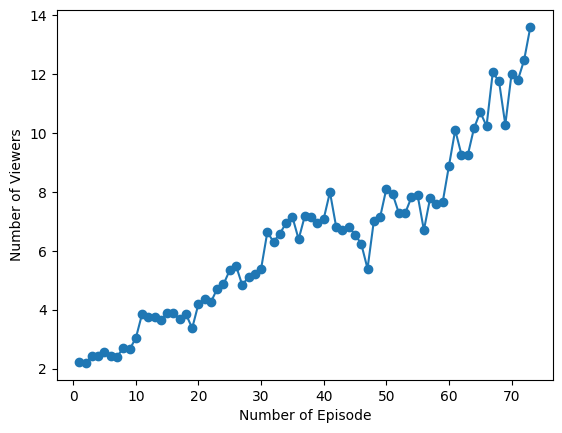

In [261]:
sub_data = dfgot[['Number_Overall','Viewers']]
data_temp = sub_data.sort_values('Number_Overall')
plt.plot(data_temp.Number_Overall, data_temp.Viewers, 'o-')
plt.xlabel("Number of Episode")
plt.ylabel("Number of Viewers")

### Following Boxplot diagram shows how many viewers each Nth episode of a Season gets.
This actually shows how the hype is at its peak in the first Episode and gradually decreases and increases later on in the Midseason to follow the same pattern till the last episode

Text(0.5, 0, 'Nth Episode in A Season')

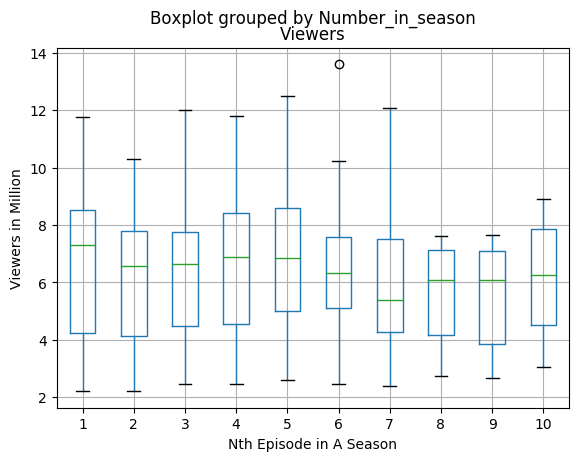

In [262]:
dfgot.boxplot(column="Viewers", by="Number_in_season")
plt.ylabel("Viewers in Million")
plt.xlabel("Nth Episode in A Season")

## Interpreting Results

The results from EDA shows the David Benioff & D.B. Weiss are the most successful directors in the whole run and Dave Hill is the most successful writer in the whole run. Also, the viewers count gradually increased for the show and topped in the last episode at 13.61 Millions. Also, the box plot shows the number of viewers each nth episode of a season could hold on average.